In [1]:
import numpy as np
import pandas as pd
import sys

In [2]:
import imputer
imp = imputer.Imputer()

In [3]:
dense_mat = pd.read_csv('./datasets/Seattle-data-set/mat.csv',index_col=0)
rm = pd.read_csv('./datasets/Seattle-data-set/RM_mat.csv',index_col=0)
dense_mat = dense_mat.values
rm = rm.values


binary_mat2 = np.round(rm + 0.5 - 0.2)
binary_mat4 = np.round(rm+0.5 -0.4)
binary_mat6= np.round(rm+0.5-0.6)
binary_mat8= np.round(rm+0.5-0.8)

nan_mat2 = binary_mat2.copy()
nan_mat4 = binary_mat4.copy()
nan_mat6 = binary_mat6.copy()
nan_mat8 = binary_mat8.copy()

nan_mat2[nan_mat2 == 0] = np.nan
nan_mat4[nan_mat4 == 0] = np.nan
nan_mat6[nan_mat6 == 0] = np.nan
nan_mat8[nan_mat8 == 0] = np.nan


sparse_mat2 = np.multiply(nan_mat2, dense_mat)
sparse_mat4 = np.multiply(nan_mat4, dense_mat)
sparse_mat6 = np.multiply(nan_mat6, dense_mat)
sparse_mat8 = np.multiply(nan_mat8, dense_mat)

In [70]:
sparse_mat2

array([[ 6.19391382e+001,  6.19391112e+001,  6.19918007e+001, ...,
        -3.24230262e+146,  6.39851115e+001,  6.37704700e+001],
       [ 0.00000000e+000,  6.50824501e+001,  6.53091228e+001, ...,
         6.72207347e+001,  6.45631471e+001,  6.39848665e+001],
       [ 6.20773971e+001,  6.48083448e+001,  6.48082929e+001, ...,
         6.81932069e+001,  6.71218346e+001,  2.87084815e+151],
       ...,
       [ 6.81125706e+001,              nan,              nan, ...,
         6.41868267e+001,  6.31857782e+001,  6.74648200e+001],
       [             nan,  5.89490339e+001,  5.66714267e+001, ...,
                     nan,  5.87372462e+001,  6.46934372e+001],
       [ 6.20320620e+001,  6.12120687e+001,  5.74887325e+001, ...,
         6.10003110e+001,  5.34841360e+001,  6.48277723e+001]])

In [4]:
knn_res2 = imp.knn(sparse_mat2)
knn_res4 = imp.knn(sparse_mat4)
knn_res6 = imp.knn(sparse_mat6)
knn_res8 = imp.knn(sparse_mat8)

In [5]:
from sklearn import metrics
def mape(y_true,y_pred):
    return np.mean(np.abs(y_pred-y_true)/y_true)*100
def rmse(y_true,y_pred):
    return np.sqrt(metrics.mean_squared_error(y_pred,y_true))

In [7]:
pos2 = np.where((dense_mat != 0) & (binary_mat2 == 0))
pos4 = np.where((dense_mat != 0) & (binary_mat4 == 0))
pos6 = np.where((dense_mat != 0) & (binary_mat6 == 0))
pos8 = np.where((dense_mat != 0) & (binary_mat8 == 0))

In [8]:
knn_mape2 = mape(dense_mat[pos2],knn_res2[pos2])
knn_mape4 = mape(dense_mat[pos4],knn_res4[pos4])
knn_mape6 = mape(dense_mat[pos6],knn_res6[pos6])
knn_mape8 = mape(dense_mat[pos8],knn_res8[pos8])

In [18]:
knn_rmse2 = rmse(dense_mat[pos2],knn_res2[pos2])
knn_rmse4 = rmse(dense_mat[pos4],knn_res2[pos4])
knn_rmse6 = rmse(dense_mat[pos6],knn_res2[pos6])
knn_rmse8 = rmse(dense_mat[pos8],knn_res2[pos8])

In [16]:
print("knn mape ,missing rate\n20% {}\n40% {}\n60% {}\n80% {}".format(knn_mape2,knn_mape4,knn_mape6,knn_mape8))
# knn mape ,missing rate
# 20% 8.552323762998148
# 40% 9.362702031879724
# 60% 10.360443113147243
# 80% 12.368586561731675

knn mape ,missing rate
20% 8.552323762998148
40% 9.362702031879724
60% 10.360443113147243
80% 12.368586561731675


In [19]:
print("knn rmse ,missing rate\n20% {}\n40% {}\n60% {}\n80% {}".format(knn_rmse2,knn_rmse4,knn_rmse6,knn_rmse8))
# knn rmse ,missing rate
# 20% 4.896473316992998
# 40% 3.482347108956469
# 60% 2.872982217783698
# 80% 2.4700221969003824

knn rmse ,missing rate
20% 4.896473316992998
40% 3.482347108956469
60% 2.872982217783698
80% 2.4700221969003824


In [17]:
bn_res2 = imp.bn(sparse_mat2)
bn_res4 = imp.bn(sparse_mat4)
bn_res6 = imp.bn(sparse_mat6)
bn_res8 = imp.bn(sparse_mat8)


In [23]:
bn_mape2 = mape(dense_mat[pos2],bn_res2[pos2])
bn_mape4 = mape(dense_mat[pos4],bn_res2[pos4])
bn_mape6 = mape(dense_mat[pos6],bn_res2[pos6])
bn_mape8 = mape(dense_mat[pos8],bn_res2[pos8])

In [24]:
print("bn mape ,missing rate\n20% {}\n40% {}\n60% {}\n80% {}".format(bn_mape2,bn_mape4,bn_mape6,bn_mape8))
# bn mape ,missing rate
# 20% 19.229660778581366
# 40% 9.726328975875411
# 60% 6.620193974564116
# 80% 4.893353051478417

bn mape ,missing rate
20% 19.229660778581366
40% 9.726328975875411
60% 6.620193974564116
80% 4.893353051478417


In [25]:
bn_rmse2 = rmse(dense_mat[pos2],bn_res2[pos2])
bn_rmse4 = rmse(dense_mat[pos4],bn_res2[pos4])
bn_rmse6 = rmse(dense_mat[pos6],bn_res2[pos6])
bn_rmse8 = rmse(dense_mat[pos8],bn_res2[pos8])

In [26]:
print("bn rmse ,missing rate\n20% {}\n40% {}\n60% {}\n80% {}".format(bn_rmse2,bn_rmse4,bn_rmse6,bn_rmse8))
# bn rmse ,missing rate
# 20% 9.107861311615226
# 40% 6.477464994490664
# 60% 5.343993910780677
# 80% 4.5944536301068535

bn rmse ,missing rate
20% 9.107861311615226
40% 6.477464994490664
60% 5.343993910780677
80% 4.5944536301068535


In [27]:
ppca_res2 = imp.ppca(sparse_mat2,20)
ppca_res4 = imp.ppca(sparse_mat4,20)
ppca_res6 = imp.ppca(sparse_mat6,20)
ppca_res8 = imp.ppca(sparse_mat8,20)


In [28]:
ppca_mape2 = mape(dense_mat[pos2],ppca_res2[pos2])
ppca_mape4 = mape(dense_mat[pos4],ppca_res2[pos4])
ppca_mape6 = mape(dense_mat[pos6],ppca_res2[pos6])
ppca_mape8 = mape(dense_mat[pos8],ppca_res2[pos8])

In [29]:
ppca_rmse2 = rmse(dense_mat[pos2],ppca_res2[pos2])
ppca_rmse4 = rmse(dense_mat[pos4],ppca_res2[pos4])
ppca_rmse6 = rmse(dense_mat[pos6],ppca_res2[pos6])
ppca_rmse8 = rmse(dense_mat[pos8],ppca_res2[pos8])

In [30]:
print("ppca mape ,missing rate\n20% {}\n40% {}\n60% {}\n80% {}".format(ppca_mape2,ppca_mape4,ppca_mape6,ppca_mape8))
# ppca mape ,missing rate
# 20% 7.751898215985288
# 40% 3.9208966348566534
# 60% 2.668745457957377
# 80% 1.9726179898187541

ppca mape ,missing rate
20% 7.751898215985288
40% 3.9208966348566534
60% 2.668745457957377
80% 1.9726179898187541


In [31]:
print("ppca rmse ,missing rate\n20% {}\n40% {}\n60% {}\n80% {}".format(ppca_rmse2,ppca_rmse4,ppca_rmse6,ppca_rmse8))
# ppca rmse ,missing rate
# 20% 4.638329772668198
# 40% 3.298756723166862
# 60% 2.7215177321288944
# 80% 2.3398018846082738

ppca rmse ,missing rate
20% 4.638329772668198
40% 3.298756723166862
60% 2.7215177321288944
80% 2.3398018846082738


<ipython-input-69-0db3c6ae468a>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x)
<ipython-input-69-0db3c6ae468a>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x)


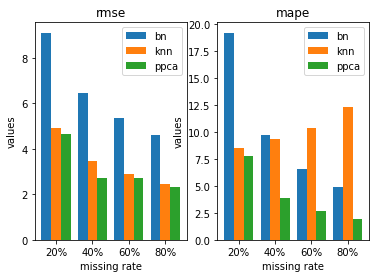

In [69]:
import matplotlib.pyplot as plt
x = ['20%','40%','60%','80%']
bn_rmse = [bn_rmse2,bn_rmse4,bn_rmse6,bn_rmse8]
bn_mape = [bn_mape2,bn_mape4,bn_mape6,bn_mape8]
knn_rmse = [knn_rmse2,knn_rmse4,knn_rmse6,knn_rmse8]
knn_mape = [knn_mape2,knn_mape4,knn_mape6,knn_mape8]
ppca_rmse = [ppca_rmse2,ppca_rmse6,ppca_rmse6,ppca_rmse8]
ppca_mape = [ppca_mape2,ppca_mape4,ppca_mape6,ppca_mape8]

total_width, n = 0.8, 3
width = total_width / n
index1 = np.arange(len(x)) - (total_width-width)/2
index2 = index1+width
index3 = index2+width
ax1 = plt.subplot(121)
ax1.bar(index1,bn_rmse,width=width,label = 'bn')
ax1.bar(index2,knn_rmse,width=width,label = 'knn')
ax1.bar(index3,ppca_rmse,width=width,label = 'ppca')
ax1.legend()
ax1.set_title('rmse')
ax1.set_xlabel("missing rate")
ax1.set_ylabel("values")

# print(x)
x.insert(0,'0')
ax1.set_xticklabels(x)
ax2 = plt.subplot(122)
ax2.bar(index1,bn_mape,width=width,label = 'bn')
ax2.bar(index2,knn_mape,width=width,label = 'knn')
ax2.bar(index3,ppca_mape,width=width,label = 'ppca')
ax2.set_xticklabels(x)
ax2.legend()
ax2.set_title('mape')
ax2.set_xlabel("missing rate")
ax2.set_ylabel("values")
plt.show()